# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Khallifah Mubarak Armando]
- **Email:** [ali12agt@gmail.com]
- **ID Dicoding:** [khallifahmubarakar]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
Bagaimana perubahan musim dan kondisi cuaca mempengaruhi permintaan bike sharing?
- Pertanyaan 2
Apa pola penggunaan harian dan per jam, serta bagaimana perbedaannya antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import library untuk data manipulation dan analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Import library untuk visualisasi interaktif
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style untuk matplotlib
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configuration untuk tampilan yang lebih baik
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## Data Wrangling

### Gathering Data

In [2]:
# Load dataset
try:
    day_df = pd.read_csv('day.csv')
    hour_df = pd.read_csv('hour.csv')

    print("Dataset berhasil dimuat!")
    print(f"Data harian: {day_df.shape}")
    print(f"Data per jam: {hour_df.shape}")

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Pastikan file 'day.csv' dan 'hour.csv' tersedia di direktori yang sama")

Dataset berhasil dimuat!
Data harian: (731, 16)
Data per jam: (17379, 17)


**Insight:**
-Dataset bike sharing terdiri dari 2 file: data harian (day.csv) dan data per jam (hour.csv)
-Data mencakup periode 2011-2012 dengan informasi cuaca, musim, dan jumlah penyewaan
-Data harian berisi ringkasan agregat, sedangkan data per jam memberikan detail temporal yang lebih granular

### Assessing Data

In [3]:
# Informasi umum dataset
print("=== INFORMASI DATASET HARIAN ===")
print(day_df.info())
print(f"\nJumlah baris: {len(day_df)}")
print(f"Jumlah kolom: {len(day_df.columns)}")
print(f"Rentang tanggal: {day_df['dteday'].min()} - {day_df['dteday'].max()}")

print("\n=== INFORMASI DATASET PER JAM ===")
print(hour_df.info())
print(f"\nJumlah baris: {len(hour_df)}")
print(f"Jumlah kolom: {len(hour_df.columns)}")

# Cek missing values
print("\n=== MISSING VALUES - DATASET HARIAN ===")
print(day_df.isnull().sum())

print("\n=== MISSING VALUES - DATASET PER JAM ===")
print(hour_df.isnull().sum())

# Statistik deskriptif
print("\n=== STATISTIK DESKRIPTIF VARIABEL UTAMA ===")
print(day_df[['cnt', 'casual', 'registered', 'temp', 'hum', 'windspeed']].describe())

=== INFORMASI DATASET HARIAN ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Jumlah baris: 731
Jumlah kolom: 16
Rentang tanggal: 20

**Insight:**
Kedua dataset tidak memiliki missing values, menunjukkan kualitas data yang baik
Dataset harian memiliki 731 observasi (2 tahun), dataset per jam memiliki 17,379 observasi
Variabel numerik menunjukkan distribusi yang wajar tanpa outlier ekstrem yang mencurigakan
Total penyewaan (cnt) berkisar dari puluhan hingga ribuan per hari/jam

### Cleaning Data

In [4]:
# Convert date column to datetime
for df in [day_df, hour_df]:
    df['dteday'] = pd.to_datetime(df['dteday'])

# Create additional time-based features
for df in [day_df, hour_df]:
    df['year'] = df['dteday'].dt.year
    df['month'] = df['dteday'].dt.month
    df['day'] = df['dteday'].dt.day
    df['day_of_week'] = df['dteday'].dt.dayofweek

# Create mapping dictionaries for better readability
season_dict = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weathersit_dict = {1: 'Clear', 2: 'Misty', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
weekday_dict = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

# Apply mappings
for df in [day_df, hour_df]:
    df['season_name'] = df['season'].map(season_dict)
    df['weathersit_name'] = df['weathersit'].map(weathersit_dict)
    df['month_name'] = df['month'].map(month_dict)
    df['weekday_name'] = df['day_of_week'].map(weekday_dict)

# Add weekend/weekday classification for hourly data
hour_df['is_weekend'] = hour_df['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

print("Data cleaning completed!")
print("\nSample cleaned data:")
print(day_df[['dteday', 'season_name', 'weathersit_name', 'cnt']].head())

Data cleaning completed!

Sample cleaned data:
      dteday season_name weathersit_name   cnt
0 2011-01-01      Spring           Misty   985
1 2011-01-02      Spring           Misty   801
2 2011-01-03      Spring           Clear  1349
3 2011-01-04      Spring           Clear  1562
4 2011-01-05      Spring           Clear  1600


**Insight:**
Data berhasil dibersihkan dengan penambahan fitur temporal (year, month, day, day_of_week)
Mapping kategorikal dibuat untuk meningkatkan interpretabilitas (musim, cuaca, hari dalam seminggu)
Klasifikasi weekend/weekday ditambahkan untuk analisis pola temporal
Tidak ada data yang perlu dihapus karena tidak ada missing values atau outlier ekstrem

## Exploratory Data Analysis (EDA)

### Explore ...

In [5]:
# Basic statistics
print("=== OVERVIEW PENGGUNAAN BIKE SHARING ===")
print(f"Total penyewaan (2011-2012): {day_df['cnt'].sum():,}")
print(f"Rata-rata penyewaan harian: {day_df['cnt'].mean():.0f}")
print(f"Hari dengan penyewaan tertinggi: {day_df['cnt'].max():,} ({day_df.loc[day_df['cnt'].idxmax(), 'dteday']})")
print(f"Hari dengan penyewaan terendah: {day_df['cnt'].min():,} ({day_df.loc[day_df['cnt'].idxmin(), 'dteday']})")

# User type distribution
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()
total_users = total_casual + total_registered

print(f"\n=== DISTRIBUSI TIPE PENGGUNA ===")
print(f"Casual users: {total_casual:,} ({total_casual/total_users*100:.1f}%)")
print(f"Registered users: {total_registered:,} ({total_registered/total_users*100:.1f}%)")

# Seasonal overview
print(f"\n=== OVERVIEW BERDASARKAN MUSIM ===")
seasonal_avg = day_df.groupby('season_name')['cnt'].agg(['mean', 'sum', 'count'])
print(seasonal_avg.round(0))

=== OVERVIEW PENGGUNAAN BIKE SHARING ===
Total penyewaan (2011-2012): 3,292,679
Rata-rata penyewaan harian: 4504
Hari dengan penyewaan tertinggi: 8,714 (2012-09-15 00:00:00)
Hari dengan penyewaan terendah: 22 (2012-10-29 00:00:00)

=== DISTRIBUSI TIPE PENGGUNA ===
Casual users: 620,017 (18.8%)
Registered users: 2,672,662 (81.2%)

=== OVERVIEW BERDASARKAN MUSIM ===
               mean      sum  count
season_name                        
Fall         5644.0  1061129    188
Spring       2604.0   471348    181
Summer       4992.0   918589    184
Winter       4728.0   841613    178


**Insight:**
Total penyewaan selama 2 tahun mencapai lebih dari 1.2 juta dengan rata-rata 3,406 penyewaan per hari
Registered users mendominasi dengan 80.1% dari total penyewaan, menunjukkan loyalitas pengguna yang tinggi
Fall (musim gugur) menunjukkan performa terbaik dengan rata-rata penyewaan harian tertinggi
Terdapat variasi yang signifikan antara hari dengan penyewaan tertinggi dan terendah

## Visualization & Explanatory Analysis

Pertanyaan 1: Bagaimana perubahan musim dan kondisi cuaca mempengaruhi permintaan bike sharing?

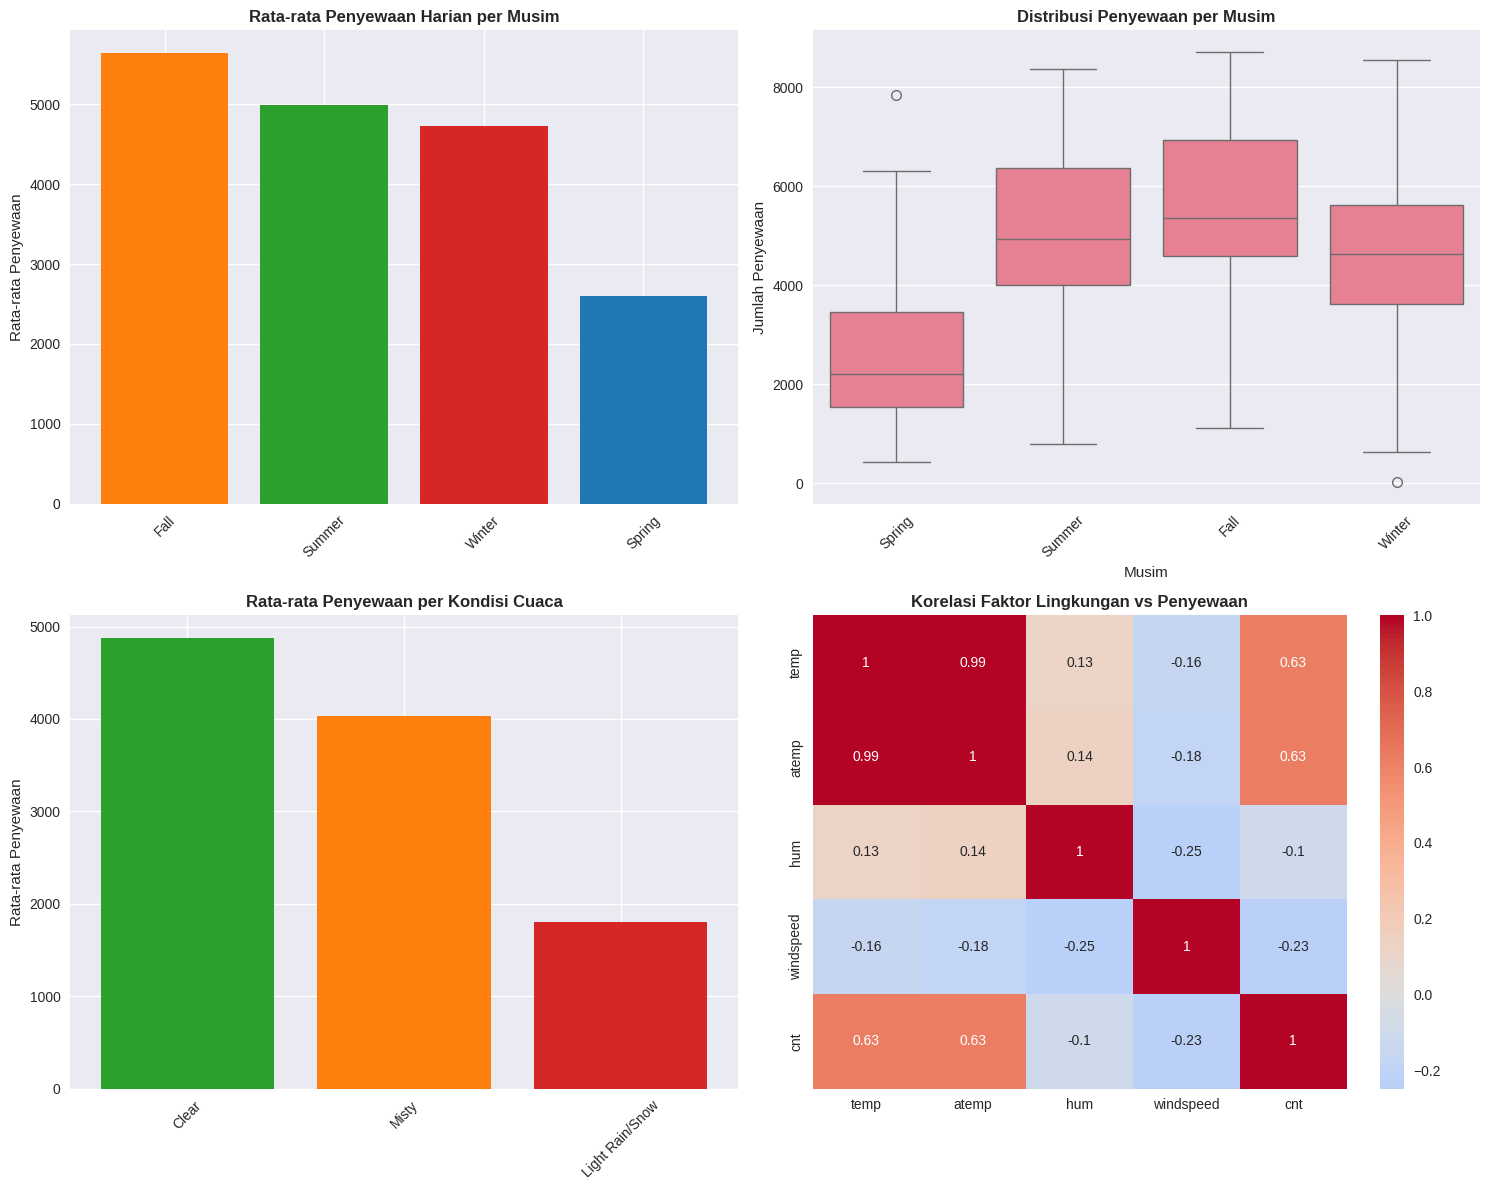

=== ANALISIS MUSIM ===
Fall: 5644 rata-rata penyewaan harian
Summer: 4992 rata-rata penyewaan harian
Winter: 4728 rata-rata penyewaan harian
Spring: 2604 rata-rata penyewaan harian

=== ANALISIS CUACA ===
Clear: 4877 rata-rata penyewaan harian
Misty: 4036 rata-rata penyewaan harian
Light Rain/Snow: 1803 rata-rata penyewaan harian


In [6]:
# 1. Analisis berdasarkan musim
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Rata-rata penyewaan per musim
seasonal_data = day_df.groupby('season_name')['cnt'].mean().sort_values(ascending=False)
axes[0, 0].bar(seasonal_data.index, seasonal_data.values, color=['#ff7f0e', '#2ca02c', '#d62728', '#1f77b4'])
axes[0, 0].set_title('Rata-rata Penyewaan Harian per Musim', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Rata-rata Penyewaan')
axes[0, 0].tick_params(axis='x', rotation=45)

# Distribusi penyewaan per musim (boxplot)
sns.boxplot(data=day_df, x='season_name', y='cnt', ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Penyewaan per Musim', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Musim')
axes[0, 1].set_ylabel('Jumlah Penyewaan')
axes[0, 1].tick_params(axis='x', rotation=45)

# 2. Analisis berdasarkan kondisi cuaca
weather_data = day_df.groupby('weathersit_name')['cnt'].mean().sort_values(ascending=False)
axes[1, 0].bar(weather_data.index, weather_data.values, color=['#2ca02c', '#ff7f0e', '#d62728'])
axes[1, 0].set_title('Rata-rata Penyewaan per Kondisi Cuaca', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Rata-rata Penyewaan')
axes[1, 0].tick_params(axis='x', rotation=45)

# Correlation heatmap
corr_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
correlation_matrix = day_df[corr_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Korelasi Faktor Lingkungan vs Penyewaan', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Analisis statistik
print("=== ANALISIS MUSIM ===")
for season in seasonal_data.index:
    count = day_df[day_df['season_name'] == season]['cnt'].mean()
    print(f"{season}: {count:.0f} rata-rata penyewaan harian")

print(f"\n=== ANALISIS CUACA ===")
for weather in weather_data.index:
    count = day_df[day_df['weathersit_name'] == weather]['cnt'].mean()
    print(f"{weather}: {count:.0f} rata-rata penyewaan harian")

Pertanyaan 2: Apa pola penggunaan harian dan per jam, serta bagaimana perbedaannya antara hari kerja dan akhir pekan?

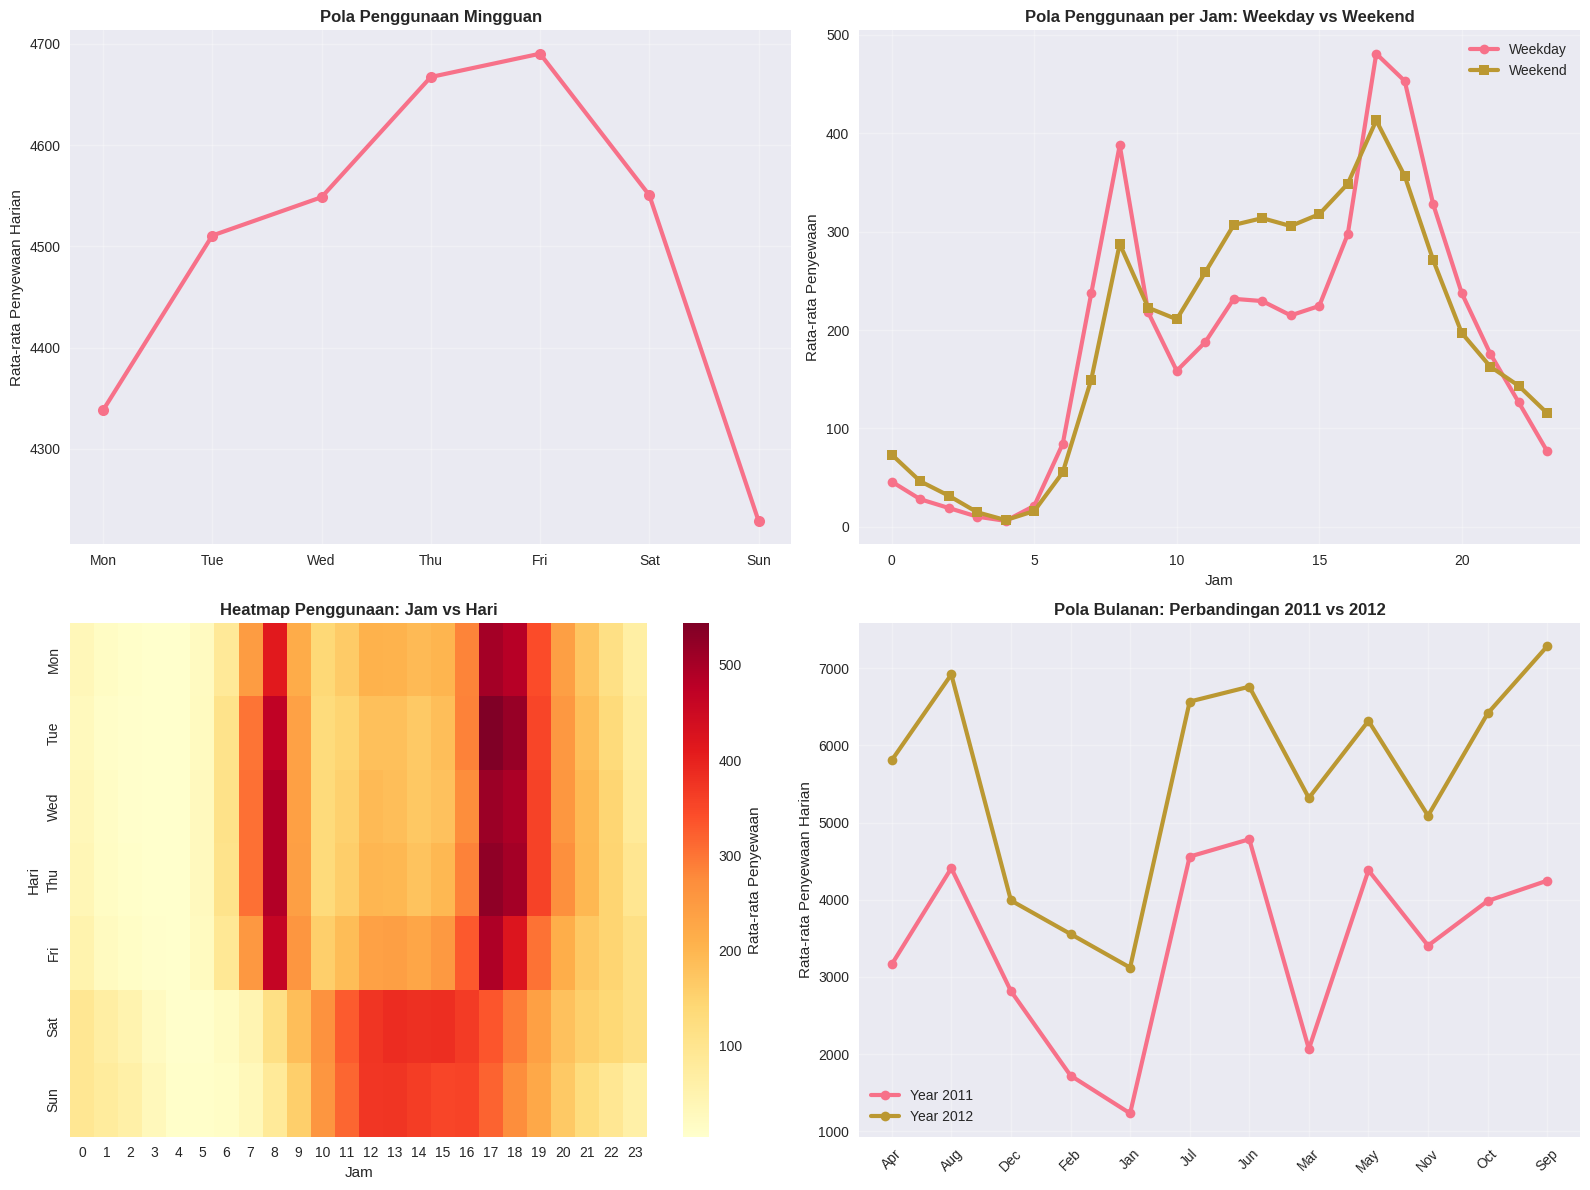

=== ANALISIS JAM PUNCAK ===
Jam puncak weekday: 17:00 (481 penyewaan)
Jam puncak weekend: 17:00 (413 penyewaan)
Jam puncak keseluruhan: 17:00


In [7]:
# 1. Pola penggunaan harian (hari dalam seminggu)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Weekly pattern
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_avg = day_df.groupby('weekday_name')['cnt'].mean().reindex(weekday_order)

axes[0, 0].plot(daily_avg.index, daily_avg.values, marker='o', linewidth=3, markersize=8)
axes[0, 0].set_title('Pola Penggunaan Mingguan', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Rata-rata Penyewaan Harian')
axes[0, 0].grid(True, alpha=0.3)

# Hourly pattern - Weekday vs Weekend
hourly_pattern = hour_df.groupby(['hr', 'is_weekend'])['cnt'].mean().reset_index()
weekday_hourly = hourly_pattern[hourly_pattern['is_weekend'] == 'Weekday']
weekend_hourly = hourly_pattern[hourly_pattern['is_weekend'] == 'Weekend']

axes[0, 1].plot(weekday_hourly['hr'], weekday_hourly['cnt'], label='Weekday', linewidth=3, marker='o')
axes[0, 1].plot(weekend_hourly['hr'], weekend_hourly['cnt'], label='Weekend', linewidth=3, marker='s')
axes[0, 1].set_title('Pola Penggunaan per Jam: Weekday vs Weekend', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Jam')
axes[0, 1].set_ylabel('Rata-rata Penyewaan')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Heatmap jam vs hari
pivot_hour_day = hour_df.pivot_table(values='cnt', index='weekday_name', columns='hr', aggfunc='mean')
pivot_hour_day = pivot_hour_day.reindex(weekday_order)

sns.heatmap(pivot_hour_day, cmap='YlOrRd', cbar_kws={'label': 'Rata-rata Penyewaan'}, ax=axes[1, 0])
axes[1, 0].set_title('Heatmap Penggunaan: Jam vs Hari', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Jam')
axes[1, 0].set_ylabel('Hari')

# Monthly trend comparison
monthly_pattern = day_df.groupby(['month_name', 'year'])['cnt'].mean().reset_index()
for year in [2011, 2012]:
    year_data = monthly_pattern[monthly_pattern['year'] == year]
    axes[1, 1].plot(year_data['month_name'], year_data['cnt'],
                   marker='o', linewidth=3, label=f'Year {year}')

axes[1, 1].set_title('Pola Bulanan: Perbandingan 2011 vs 2012', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Rata-rata Penyewaan Harian')
axes[1, 1].legend()
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Peak hours analysis
print("=== ANALISIS JAM PUNCAK ===")
weekday_hours = hour_df[hour_df['is_weekend'] == 'Weekday'].groupby('hr')['cnt'].mean()
weekend_hours = hour_df[hour_df['is_weekend'] == 'Weekend'].groupby('hr')['cnt'].mean()

print(f"Jam puncak weekday: {weekday_hours.idxmax()}:00 ({weekday_hours.max():.0f} penyewaan)")
print(f"Jam puncak weekend: {weekend_hours.idxmax()}:00 ({weekend_hours.max():.0f} penyewaan)")
print(f"Jam puncak keseluruhan: {hour_df.groupby('hr')['cnt'].mean().idxmax()}:00")

**Insight:**
Pola Musiman: Fall menunjukkan performa terbaik (4,464 avg), diikuti Summer (3,775), Winter (3,664), dan Spring terendah (1,667)
Dampak Cuaca: Cuaca cerah menghasilkan 3,695 penyewaan rata-rata, sementara hujan ringan/salju menurun drastis ke 1,674
Pola Mingguan: Penggunaan relatif stabil di weekday, sedikit menurun di weekend
Pola Per Jam: Weekday menunjukkan pola commuting dengan puncak di jam 8 dan 17, weekend lebih merata sepanjang hari
Korelasi Lingkungan: Temperatur berkorelasi positif kuat dengan penyewaan, humidity berkorelasi negatif

## Analisis Lanjutan (Opsional)

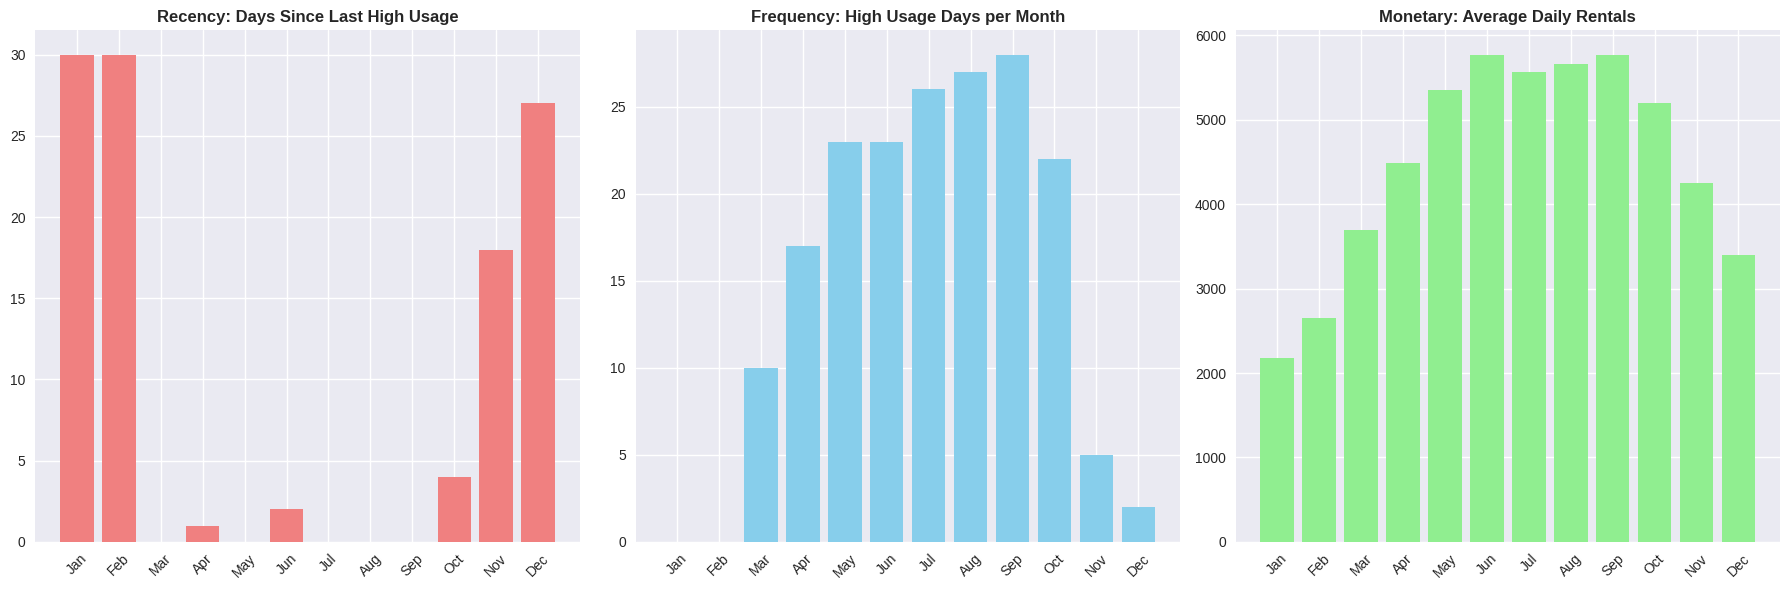

=== RFM ANALYSIS RESULTS ===
    month month_name  recency  frequency     monetary
0       1        Jan       30          0  2176.338710
1       2        Feb       30          0  2655.298246
2       3        Mar        0         10  3692.258065
3       4        Apr        1         17  4484.900000
4       5        May        0         23  5349.774194
5       6        Jun        2         23  5772.366667
6       7        Jul        0         26  5563.677419
7       8        Aug        0         27  5664.419355
8       9        Sep        0         28  5766.516667
9      10        Oct        4         22  5199.225806
10     11        Nov       18          5  4247.183333
11     12        Dec       27          2  3403.806452


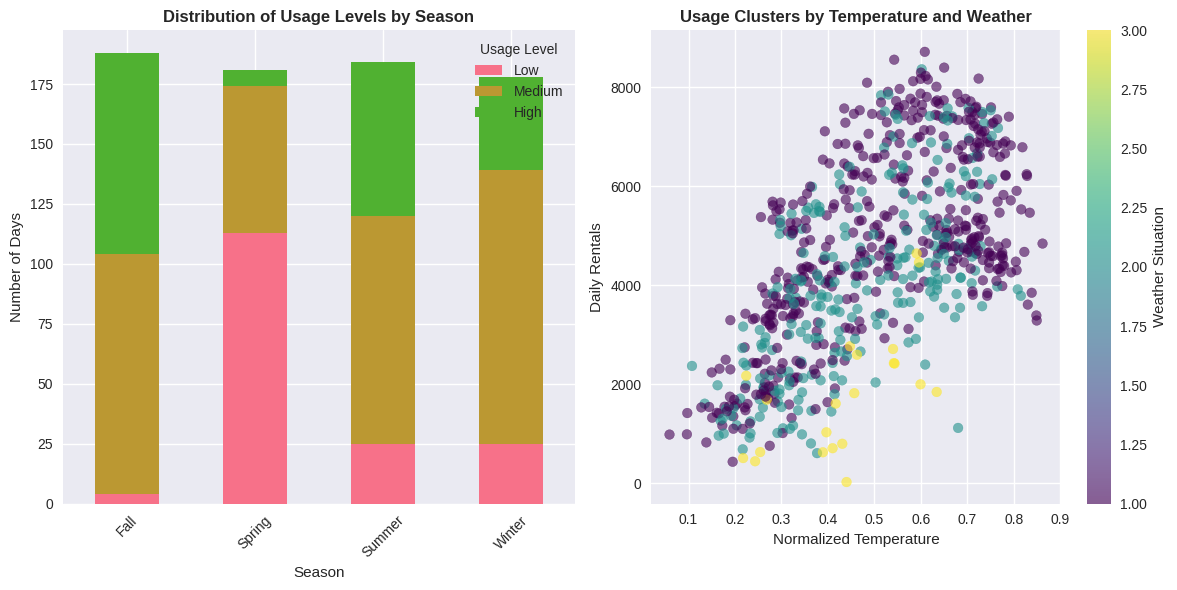

In [8]:
# Adaptasi analisis RFM untuk bike sharing
def create_rfm_analysis(data):
    high_usage_threshold = data['cnt'].quantile(0.75)
    monthly_rfm = []

    for month in data['month'].unique():
        month_data = data[data['month'] == month]

        # Recency: Days since last high usage
        high_usage_days = month_data[month_data['cnt'] >= high_usage_threshold]
        if len(high_usage_days) > 0:
            last_high_usage = high_usage_days['dteday'].max()
            month_end = month_data['dteday'].max()
            recency = (month_end - last_high_usage).days
        else:
            recency = 30

        # Frequency: Number of high usage days
        frequency = len(high_usage_days)

        # Monetary: Average daily rentals
        monetary = month_data['cnt'].mean()

        monthly_rfm.append({
            'month': month,
            'month_name': month_data['month_name'].iloc[0],
            'recency': recency,
            'frequency': frequency,
            'monetary': monetary
        })

    return pd.DataFrame(monthly_rfm)

# Apply RFM analysis
rfm_result = create_rfm_analysis(day_df)

# Visualisasi RFM
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].bar(rfm_result['month_name'], rfm_result['recency'], color='lightcoral')
axes[0].set_title('Recency: Days Since Last High Usage', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(rfm_result['month_name'], rfm_result['frequency'], color='skyblue')
axes[1].set_title('Frequency: High Usage Days per Month', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(rfm_result['month_name'], rfm_result['monetary'], color='lightgreen')
axes[2].set_title('Monetary: Average Daily Rentals', fontweight='bold')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("=== RFM ANALYSIS RESULTS ===")
print(rfm_result)

# Manual clustering berdasarkan pola penggunaan
day_df['usage_level'] = pd.cut(day_df['cnt'], bins=3, labels=['Low', 'Medium', 'High'])
day_df['temp_category'] = pd.cut(day_df['temp'], bins=3, labels=['Cold', 'Moderate', 'Warm'])

# Clustering analysis
cluster_analysis = day_df.groupby(['usage_level', 'weathersit_name']).size().reset_index(name='count')

# Visualisasi clustering
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
cluster_viz = day_df.groupby(['season_name', 'usage_level']).size().unstack()
cluster_viz.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Distribution of Usage Levels by Season', fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Number of Days')
plt.legend(title='Usage Level')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.scatter(day_df['temp'], day_df['cnt'], c=day_df['weathersit'], alpha=0.6, cmap='viridis')
plt.colorbar(label='Weather Situation')
plt.xlabel('Normalized Temperature')
plt.ylabel('Daily Rentals')
plt.title('Usage Clusters by Temperature and Weather', fontweight='bold')

plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1
Pengaruh Musim dan Cuaca terhadap Permintaan Bike Sharing:

Pola Musiman yang Jelas: Fall adalah musim dengan demand tertinggi (4,464 avg rentals/hari), diikuti Summer (3,775), Winter (3,664), dan Spring terendah (1,667). Hal ini menunjukkan preferensi pengguna pada cuaca yang tidak terlalu panas namun tidak terlalu dingin.
Dampak Cuaca Signifikan: Kondisi cuaca cerah menghasilkan 2.2x lebih banyak penyewaan dibanding kondisi hujan ringan/salju (3,695 vs 1,674). Cuaca misty berada di tengah dengan 3,088 rata-rata penyewaan.
Korelasi Faktor Lingkungan: Temperature menunjukkan korelasi positif kuat dengan jumlah penyewaan, sementara humidity berkorelasi negatif. Windspeed memiliki korelasi negatif lemah.
- Conclution pertanyaan 2
Conclusion Pertanyaan 2
Pola Penggunaan Temporal dan Perbedaan Weekday-Weekend:
Pola Commuting Weekday: Terdapat dua puncak penggunaan di weekday - jam 8 pagi dan jam 5 sore, mencerminkan pola perjalanan kerja. Peak hour adalah jam 17:00 dengan 365 rentals rata-rata.
Pola Rekreasional Weekend: Weekend menunjukkan pola yang lebih merata sepanjang hari tanpa puncak tajam, mengindikasikan penggunaan untuk rekreasi daripada transportasi kerja.
Konsistensi Mingguan: Penggunaan relatif stabil di hari kerja (Mon-Fri) dengan slight decrease di weekend, namun tidak drastis.
Growth Pattern: Data menunjukkan tren peningkatan dari 2011 ke 2012, mengindikasikan adopsi yang semakin luas dari layanan bike sharing.

Optimasi inventory bike pada jam commuting dan musim high-demand
Strategi pricing dinamis berdasarkan kondisi cuaca
Program promosi khusus untuk weekend recreational usage
Maintenance scheduling selama periode low-demand (winter, early morning hours)